In [1]:
import xlearn as xl
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv("data.csv")
df

Удалим ненужные фичи, разделим на train/val/test

In [3]:
drop_names = ['banner_id0', 'banner_id1', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1' ]
for name in drop_names:
    df.pop(name)
df.pop('impressions')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(1390198)
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,1
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,1
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,1
...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35,146,530,4329496688011613719,0,2,9,0
15821468,2021-09-27 22:03:14,12,22,453968700792456599,0,1,6,0
15821469,2021-10-02 17:41:10,12,1236,9112780675655118328,0,2,0,0
15821470,2021-09-29 00:39:32,967,21,6968514095695555037,0,0,0,0


In [4]:
df = df.sort_values("date_time")

In [5]:
max_date = df["date_time"].iloc[-1].date()
max_date

datetime.date(2021, 10, 2)

In [6]:
df_test = df[(df['date_time'].dt.date == max_date)]
df = df[(df['date_time'].dt.date < max_date)]


In [7]:
df = df.sort_values("date_time")

In [8]:
max_date = df["date_time"].iloc[-1].date()

In [9]:
max_date

datetime.date(2021, 10, 1)

In [10]:
df_val = df[(df['date_time'].dt.date == max_date)]
df = df[(df['date_time'].dt.date < max_date)]


In [11]:
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
8423230,2021-09-26 00:00:00,1412,156,784103469229141782,0,1,12,0
14840335,2021-09-26 00:00:00,87,99,5299288921807778081,0,1,1,0
12701328,2021-09-26 00:00:00,243,21,7843381368818250552,0,0,0,0
13054066,2021-09-26 00:00:00,0,7,2939587009140698008,0,4,1,0
10652366,2021-09-26 00:00:00,2,196,3723632517254901476,0,0,0,0
...,...,...,...,...,...,...,...,...
11159519,2021-09-30 23:59:59,168,161,8481381842118306791,0,0,1,0
3842833,2021-09-30 23:59:59,77,231,6255040383984554244,0,3,0,0
6198955,2021-09-30 23:59:59,15,202,8452423829699085197,0,0,15,0
12346,2021-09-30 23:59:59,68,21,9048424169260785187,0,0,0,1


In [12]:
df_val

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
7465011,2021-10-01 00:00:00,14,0,7558598582596132463,0,0,0,0
52924,2021-10-01 00:00:00,14,83,8455259240578789950,0,2,3,1
4676591,2021-10-01 00:00:00,14,384,5274157095111279519,0,1,3,0
6811089,2021-10-01 00:00:00,168,49,5703620665238317782,0,0,0,0
11268423,2021-10-01 00:00:00,1,579,326442446341096655,0,0,8,0
...,...,...,...,...,...,...,...,...
6809215,2021-10-01 23:59:59,275,102,2807164680012628209,0,4,1,0
9789489,2021-10-01 23:59:59,12,173,1227595874551336133,0,2,7,0
14917859,2021-10-01 23:59:59,17,76,8694953474274391876,0,1,3,0
10913431,2021-10-01 23:59:59,17,52,5271583595053277222,1,2,5,0


In [13]:
df_test

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
9767447,2021-10-02 00:00:00,0,76,3615498569651227068,0,1,3,0
13846765,2021-10-02 00:00:00,14,40,3504898510001081112,0,1,0,0
3091651,2021-10-02 00:00:00,76,7,4016064483098779580,0,4,1,0
10045990,2021-10-02 00:00:00,17,132,2660767342182365745,0,2,0,0
9054327,2021-10-02 00:00:00,24,428,684235863208116380,0,1,10,0
...,...,...,...,...,...,...,...,...
1745969,2021-10-02 23:59:59,0,1240,1602730444213689664,0,6,0,0
13959634,2021-10-02 23:59:59,76,223,7727064149323604529,2,3,0,0
13319080,2021-10-02 23:59:59,20,1240,6641189974907647716,0,6,0,0
3336944,2021-10-02 23:59:59,24,556,5831343304744661795,0,0,12,0


Создадим interactions и удолим ненужные для обучения данные

(0.0, 100.0)

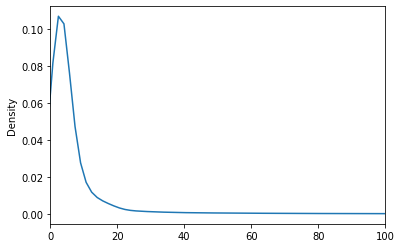

In [42]:
df['campaign_clicks'][df['campaign_clicks'] > 1].plot(kind='kde')
plt.xlim(0, 100)

In [43]:
def data_preparation(df):
    df.loc[df.campaign_clicks > 10, "campaign_clicks"] = 10

    df["hour"] = df["date_time"].dt.hour
    
    df["local_time"] = (df["country_id"].astype("str") + '_' + df["hour"].astype("str"))
    df["os_zone"] = (df["os_id"].astype("str") + '_' + df["zone_id"].astype("str"))
    df["country_banner"] = (df["country_id"].astype("str") + '_' + df["banner_id"].astype("str"))
    
    for col in ["date_time", "hour"]:
        df.pop(col)
        
    df = df.astype("category")

    return df



In [44]:
data_preparation(df)

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,12_0,1_1412,12_156
14840335,87,99,5299288921807778081,0,1,1,0,1_0,1_87,1_99
12701328,243,21,7843381368818250552,0,0,0,0,0_0,0_243,0_21
13054066,0,7,2939587009140698008,0,4,1,0,1_0,4_0,1_7
10652366,2,196,3723632517254901476,0,0,0,0,0_0,0_2,0_196
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,1_23,0_168,1_161
3842833,77,231,6255040383984554244,0,3,0,0,0_23,3_77,0_231
6198955,15,202,8452423829699085197,0,0,15,0,15_23,0_15,15_202
12346,68,21,9048424169260785187,0,0,0,1,0_23,0_68,0_21


In [48]:
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,12_0,1_1412,12_156
14840335,87,99,5299288921807778081,0,1,1,0,1_0,1_87,1_99
12701328,243,21,7843381368818250552,0,0,0,0,0_0,0_243,0_21
13054066,0,7,2939587009140698008,0,4,1,0,1_0,4_0,1_7
10652366,2,196,3723632517254901476,0,0,0,0,0_0,0_2,0_196
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,1_23,0_168,1_161
3842833,77,231,6255040383984554244,0,3,0,0,0_23,3_77,0_231
6198955,15,202,8452423829699085197,0,0,15,0,15_23,0_15,15_202
12346,68,21,9048424169260785187,0,0,0,1,0_23,0_68,0_21


In [51]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(df[["local_time", "os_zone", "country_banner"]])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [54]:
def transform_interactions(enc, df):
    df[["local_time", "os_zone", "country_banner"]] = enc.transform(df[["local_time", "os_zone", "country_banner"]])
    df[["local_time", "os_zone", "country_banner"]] = df[["local_time", "os_zone", "country_banner"]].astype("int").astype("category")
    return df

In [55]:
df = transform_interactions(enc, df)
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,72,2450,1796
14840335,87,99,5299288921807778081,0,1,1,0,192,3861,4313
12701328,243,21,7843381368818250552,0,0,0,0,0,1060,473
13054066,0,7,2939587009140698008,0,4,1,0,192,6578,4167
10652366,2,196,3723632517254901476,0,0,0,0,0,797,462
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,208,558,3888
3842833,77,231,6255040383984554244,0,3,0,0,16,6495,487
6198955,15,202,8452423829699085197,0,0,15,0,160,412,3032
12346,68,21,9048424169260785187,0,0,0,1,16,1840,473


In [56]:
df_test = data_preparation(df_test)

In [57]:
df_val = data_preparation(df_val)

In [58]:
df_test = transform_interactions(enc, df_test)

In [59]:
df_val = transform_interactions(enc, df_val)

In [60]:
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,72,2450,1796
14840335,87,99,5299288921807778081,0,1,1,0,192,3861,4313
12701328,243,21,7843381368818250552,0,0,0,0,0,1060,473
13054066,0,7,2939587009140698008,0,4,1,0,192,6578,4167
10652366,2,196,3723632517254901476,0,0,0,0,0,797,462
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,208,558,3888
3842833,77,231,6255040383984554244,0,3,0,0,16,6495,487
6198955,15,202,8452423829699085197,0,0,15,0,160,412,3032
12346,68,21,9048424169260785187,0,0,0,1,16,1840,473


In [61]:
df_test

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
9767447,0,76,3615498569651227068,0,1,3,0,240,2125,-1
13846765,14,40,3504898510001081112,0,1,0,0,0,2435,580
3091651,76,7,4016064483098779580,0,4,1,0,192,8159,4167
10045990,17,132,2660767342182365745,0,2,0,0,0,4502,231
9054327,24,428,684235863208116380,0,1,10,0,24,3038,1105
...,...,...,...,...,...,...,...,...,...,...
1745969,0,1240,1602730444213689664,0,6,0,0,16,9021,162
13959634,76,223,7727064149323604529,2,3,0,0,16,6492,481
13319080,20,1240,6641189974907647716,0,6,0,0,16,9180,162
3336944,24,556,5831343304744661795,0,0,12,0,88,1047,1946


In [62]:
df_val

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
7465011,14,0,7558598582596132463,0,0,0,0,0,319,0
52924,14,83,8455259240578789950,0,2,3,1,240,4300,5206
4676591,14,384,5274157095111279519,0,1,3,0,240,2435,4964
6811089,168,49,5703620665238317782,0,0,0,0,0,558,626
11268423,1,579,326442446341096655,0,0,8,0,360,1,7608
...,...,...,...,...,...,...,...,...,...,...
6809215,275,102,2807164680012628209,0,4,1,0,208,7566,3759
9789489,12,173,1227595874551336133,0,2,7,0,352,4135,7006
14917859,17,76,8694953474274391876,0,1,3,0,256,2663,-1
10913431,17,52,5271583595053277222,1,2,5,0,304,4502,6059


Переведем данные в формат для ffm с помощью функции из интернета

In [63]:
import math
from tqdm import tqdm

def _convert_to_ffm(path, df, type, target, categories, encoder):
    # Flagging categorical and numerical fields
    print('convert_to_ffm - START')
    for x in categories:
        if(x not in encoder['catdict']):
            print(f'UPDATING CATDICT: categorical field - {x}')
            encoder['catdict'][x] = 1

    nrows = df.shape[0]
    with open(path + str(type) + "_ffm.txt", "w") as text_file:

        # Looping over rows to convert each row to libffm format
        for n, r in tqdm(enumerate(range(nrows)), "Formatting", nrows):
            datastring = ""
            datarow = df.iloc[r].to_dict()
            datastring += str(int(datarow[target]))  # Set Target Variable here

            # For numerical fields, we are creating a dummy field here
            for i, x in enumerate(encoder['catdict'].keys()):

                # For a new field appearing in a training example
                if(x not in encoder['catcodes']):
                    encoder['catcodes'][x] = {}
                    encoder['currentcode'] += 1
                    encoder['catcodes'][x][datarow[x]] = encoder['currentcode']  # encoding the feature

                # For already encoded fields
                elif(datarow[x] not in encoder['catcodes'][x]):
                    encoder['currentcode'] += 1
                    encoder['catcodes'][x][datarow[x]] = encoder['currentcode']  # encoding the feature

                code = encoder['catcodes'][x][datarow[x]]
                datastring = datastring + " "+str(i)+":" + str(int(code))+":1"

            datastring += '\n'
            text_file.write(datastring)

    return encoder

In [64]:
cols = df.columns.tolist()
cols.pop(ind)

'clicks'

Подберем гиперпараметры

In [65]:
cols

['zone_id',
 'banner_id',
 'oaid_hash',
 'campaign_clicks',
 'os_id',
 'country_id',
 'local_time',
 'os_zone',
 'country_banner']

In [67]:
encoder = {"currentcode": 0,
           "catdict": {},
           "catcodes": {}}

In [68]:
encoder = _convert_to_ffm("", df, "train", "clicks", cols, encoder)

convert_to_ffm - START
UPDATING CATDICT: categorical field - zone_id
UPDATING CATDICT: categorical field - banner_id
UPDATING CATDICT: categorical field - oaid_hash
UPDATING CATDICT: categorical field - campaign_clicks
UPDATING CATDICT: categorical field - os_id
UPDATING CATDICT: categorical field - country_id
UPDATING CATDICT: categorical field - local_time
UPDATING CATDICT: categorical field - os_zone
UPDATING CATDICT: categorical field - country_banner


Formatting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12049045/12049045 [36:26<00:00, 5510.96it/s]


In [69]:
encoder = _convert_to_ffm("", df_val, "val", "clicks", cols, encoder)

convert_to_ffm - START


Formatting: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1643448/1643448 [03:34<00:00, 7671.25it/s]


In [70]:
encoder = _convert_to_ffm("", df_test, "test", "clicks", cols, encoder)


convert_to_ffm - START


Formatting: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128978/2128978 [04:32<00:00, 7821.80it/s]


In [2]:
ffm_model = xl.create_ffm()
ffm_model.setTrain("train_ffm.txt")
ffm_model.setValidate("val_ffm.txt")
params_grid = {"task": ["binary"],
               "k": [2, 4, 6],
               "lr": [0.1],
               "lambda": [0.001],
               "metric": ["auc"],
               "epoch": [100]}

In [3]:
for param in ParameterGrid(params_grid):
    print(param["k"])
    ffm_model = xl.create_ffm()
    ffm_model.setTrain("train_ffm.txt")
    ffm_model.setValidate("val_ffm.txt")
    ffm_model.fit(param, "model.out")

2
----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (train_ffm.txt.bin) NOT found. Convert text file to binary file.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (val_ffm.txt.bin) NOT found. Convert text file to binary file.
[------------] Number of Feature: 5683779
[------------] Number of Field: 9
[------------] Time cost for reading problem: 26.69 (sec)
[ A

[------------] Model file: model.out
[------------] Time cost for saving model: 5.14 (sec)
[ ACTION     ] Finish training
[ ACTION     ] Clear the xLearn environment ...
6[------------] Total time cost: 291.79 (sec)

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (train_ffm.txt.bin) found. Skip converting text to binary.
[------------] First check if the text file has been already converted to binary format.
[------------] Bin

Протестируем модель с лучшим с кором на валидации 

In [4]:
ffm_model.setTest("test_ffm.txt")
ffm_model.setMetric("auc")
ffm_model.predict("model.out", "output.txt")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for prediction task.
[ ACTION     ] Load model ...
[------------] Load model from model.out
[------------] Loss function: cross-entropy
[------------] Score function: ffm
[------------] Number of Feature: 5683779
[------------] Number of K: 6
[------------] Number of field: 9
[------------] Time cost for loading model: 1.48 (sec)
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (test_ffm.txt.bin) NOT found. Convert text file to binary file.
[-----

In [9]:
y_pred = pd.read_csv('output.txt', header=None)
trues = df_test['clicks']

In [10]:
roc_auc_score(trues, y_pred)

0.82


Итоговоя модель превзоошла по результатам прошлую